# California Wildfire Analysis

## 2020-2023 Data and Visuals

In [2]:
# Dependencies
import matplotlib.pyplot as plt
import requests
import pandas as pd
from pprint import pprint # delete this? 
import calendar

In [3]:
# base url
url = "https://data.ca.gov/api/3/action/datastore_search?resource_id=d73ee828-c2c6-485c-91dc-c26bd9ce3991" 

# Build partial query URL
query_url = f"{url}&limit=1000"
response = requests.get(query_url).json()
records = response['result']['records']

# put records in dataframe
records_df = pd.DataFrame(records)
records_df

,_id,OBJECTID,Year,State,Agency,Unit ID,Fire Name,Local Incident Number,Alarm Date,Containment Date,...,Management Objective,GIS Calculated Acres,Comments,Complex Name,IRWIN ID,Fire Number (historical use),Complex ID,DECADES,Shape__Area,Shape__Length
0,1,1,2023,CA,CDF,SKU,WHITWORTH,00004808,6/17/2023 12:00:00 AM,6/17/2023 12:00:00 AM,...,1,5.729125,None,None,{7985848C-0AC2-4BA4-8F0E-29F778652E61},None,None,2020,41407.83984375,1247.16603398886
1,2,2,2023,CA,LRA,BTU,KAISER,00010225,6/2/2023 12:00:00 AM,6/2/2023 12:00:00 AM,...,1,13.60238,None,None,{43EBCC88-B3AC-48EB-8EF5-417FE0939CCF},None,None,2020,93455.87890625,1285.51454971661
2,3,3,2023,CA,CDF,AEU,JACKSON,00017640,7/1/2023 12:00:00 AM,7/2/2023 12:00:00 AM,...,1,27.81446,None,None,{B64E1355-BF1D-441A-95D0-BC1FBB93483B},None,None,2020,183028.5,2697.58742917456
3,4,4,2023,CA,CDF,AEU,CARBON,00018821,7/11/2023 12:00:00 AM,7/11/2023 12:00:00 AM,...,1,58.76023,None,None,{CB41DB0A-E4B1-489D-A4EA-738F2CD6DB3B},None,None,2020,388221.953125,2548.73877855158
4,5,5,2023,CA,CDF,AEU,LIBERTY,00018876,7/11/2023 12:00:00 AM,7/12/2023 12:00:00 AM,...,1,70.979,None,None,{F83F70A4-07A7-40B8-BD51-10CCC1C30D63},None,None,2020,466456.0078125,5106.93652582734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,996,2020,CA,CDF,BTU,5-4 POTTERS,00009702,8/17/2020 12:00:00 AM,9/10/2020 12:00:00 AM,...,1,925.4019,None,BUTTE LIGHTNING COMPLEX,{61AA84A0-8E88-4549-B694-BF14DD6E4CD4},None,00009692,2020,6307904.03515625,16613.4839078942
996,997,997,2020,CA,CDF,BTU,5-6 CASCADE CREEK,00009703,8/17/2020 12:00:00 AM,9/10/2020 12:00:00 AM,...,1,260.1756,None,BUTTE LIGHTNING COMPLEX,{06181DB5-96CA-4953-B34A-7C7A52E8EE3A},None,00009692,2020,1780346.8984375,7022.5749273688
997,998,998,2020,CA,CDF,BTU,TEDDY,00006891,6/18/2020 12:00:00 AM,6/23/2020 12:00:00 AM,...,1,13.27956,None,None,{394ABE8D-3020-47B2-9D03-0A0387418F9F},None,None,2020,90049.49609375,1648.63306678697
998,999,999,2020,CA,CDF,CZU,COAST,00003906,6/29/2020 12:00:00 AM,6/29/2020 12:00:00 AM,...,1,20.2083,None,None,{9E02079B-C8AD-491F-A246-B3104DAD326B},None,None,2020,128343.16015625,1702.00092173474


In [4]:
# drop unnecessary columns & rename for clarity

# drop columns
records_df = records_df.drop(columns=['_id', 'OBJECTID', 'Comments', 'Complex Name', 'IRWIN ID',
                                      'Fire Number (historical use)', 'Complex ID', 'Local Incident Number',
                                      'Agency', 'Unit ID', 'State', 'Collection Method', 'Management Objective', 'DECADES'])

# rename columns
renamed_df = records_df.rename(columns={'GIS Calculated Acres': 'Acres', 'Shape__Area': 'Area', 'Shape__Length':'Perimeter'})
renamed_df

,Year,Fire Name,Alarm Date,Containment Date,Cause,Acres,Area,Perimeter
0,2023,WHITWORTH,6/17/2023 12:00:00 AM,6/17/2023 12:00:00 AM,5,5.729125,41407.83984375,1247.16603398886
1,2023,KAISER,6/2/2023 12:00:00 AM,6/2/2023 12:00:00 AM,5,13.60238,93455.87890625,1285.51454971661
2,2023,JACKSON,7/1/2023 12:00:00 AM,7/2/2023 12:00:00 AM,2,27.81446,183028.5,2697.58742917456
3,2023,CARBON,7/11/2023 12:00:00 AM,7/11/2023 12:00:00 AM,9,58.76023,388221.953125,2548.73877855158
4,2023,LIBERTY,7/11/2023 12:00:00 AM,7/12/2023 12:00:00 AM,14,70.979,466456.0078125,5106.93652582734
...,...,...,...,...,...,...,...,...
995,2020,5-4 POTTERS,8/17/2020 12:00:00 AM,9/10/2020 12:00:00 AM,1,925.4019,6307904.03515625,16613.4839078942
996,2020,5-6 CASCADE CREEK,8/17/2020 12:00:00 AM,9/10/2020 12:00:00 AM,1,260.1756,1780346.8984375,7022.5749273688
997,2020,TEDDY,6/18/2020 12:00:00 AM,6/23/2020 12:00:00 AM,14,13.27956,90049.49609375,1648.63306678697
998,2020,COAST,6/29/2020 12:00:00 AM,6/29/2020 12:00:00 AM,7,20.2083,128343.16015625,1702.00092173474


In [5]:
# add fire duration column to dataframe

# Convert 'Alarm Date' and 'Containment Date' columns to datetime format
renamed_df['Alarm Date'] = pd.to_datetime(renamed_df['Alarm Date'])
renamed_df['Containment Date'] = pd.to_datetime(renamed_df['Containment Date'])

# Extract date part only
renamed_df['Alarm Date'] = renamed_df['Alarm Date'].dt.date
renamed_df['Containment Date'] = renamed_df['Containment Date'].dt.date

# Convert 'Alarm Date' and 'Containment Date' columns back to datetime format
renamed_df['Alarm Date'] = pd.to_datetime(renamed_df['Alarm Date'])
renamed_df['Containment Date'] = pd.to_datetime(renamed_df['Containment Date'])

# Calculate duration in days and add as a new column
renamed_df['Duration (Days)'] = (renamed_df['Containment Date'] - renamed_df['Alarm Date']).dt.days

new_order = ['Year', 'Fire Name', 'Alarm Date', 'Containment Date', 'Duration (Days)', 'Cause', 'Acres', 'Area', 'Perimeter']

df_reordered = renamed_df[new_order]
df_reordered

C:\Users\jenni\AppData\Local\Temp\ipykernel_18440\2301503237.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  renamed_df['Alarm Date'] = pd.to_datetime(renamed_df['Alarm Date'])
C:\Users\jenni\AppData\Local\Temp\ipykernel_18440\2301503237.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  renamed_df['Containment Date'] = pd.to_datetime(renamed_df['Containment Date'])


,Year,Fire Name,Alarm Date,Containment Date,Duration (Days),Cause,Acres,Area,Perimeter
0,2023,WHITWORTH,2023-06-17,2023-06-17,0.0,5,5.729125,41407.83984375,1247.16603398886
1,2023,KAISER,2023-06-02,2023-06-02,0.0,5,13.60238,93455.87890625,1285.51454971661
2,2023,JACKSON,2023-07-01,2023-07-02,1.0,2,27.81446,183028.5,2697.58742917456
3,2023,CARBON,2023-07-11,2023-07-11,0.0,9,58.76023,388221.953125,2548.73877855158
4,2023,LIBERTY,2023-07-11,2023-07-12,1.0,14,70.979,466456.0078125,5106.93652582734
...,...,...,...,...,...,...,...,...,...
995,2020,5-4 POTTERS,2020-08-17,2020-09-10,24.0,1,925.4019,6307904.03515625,16613.4839078942
996,2020,5-6 CASCADE CREEK,2020-08-17,2020-09-10,24.0,1,260.1756,1780346.8984375,7022.5749273688
997,2020,TEDDY,2020-06-18,2020-06-23,5.0,14,13.27956,90049.49609375,1648.63306678697
998,2020,COAST,2020-06-29,2020-06-29,0.0,7,20.2083,128343.16015625,1702.00092173474


In [6]:
# map fire causes

# fire causes mapping dictionary
cause_mapping = {
    '1': 'Lightning',
    '2': 'Equipment Use',
    '3': 'Smoking',
    '4': 'Campfire',
    '5': 'Debris',
    '6': 'Railroad',
    '7': 'Arson',
    '8': 'Playing with fire',
    '9': 'Miscellaneous',
    '10': 'Vehicle',
    '11': 'Powerline',
    '12': 'Firefighter Training',
    '13': 'Non-Firefighter Training',
    '14': 'Unknown / Unidentified',
    '15': 'Structure',
    '16': 'Aircraft',
    '17': '',
    '18': 'Escaped Prescribed Burn',
    '19': 'Illegal Alien Campfire'
}

# replace cause values with causes
df_reordered['Cause'] = df_reordered['Cause'].replace(cause_mapping)

#output csv
df_reordered.to_csv("output/fires_2020-2023.csv", encoding="utf-8", index=False, header=True)

# display dataframe
df_reordered.head()

,Year,Fire Name,Alarm Date,Containment Date,Duration (Days),Cause,Acres,Area,Perimeter
0,2023,WHITWORTH,2023-06-17,2023-06-17,0.0,Debris,5.729125,41407.83984375,1247.16603398886
1,2023,KAISER,2023-06-02,2023-06-02,0.0,Debris,13.60238,93455.87890625,1285.51454971661
2,2023,JACKSON,2023-07-01,2023-07-02,1.0,Equipment Use,27.81446,183028.5,2697.58742917456
3,2023,CARBON,2023-07-11,2023-07-11,0.0,Miscellaneous,58.76023,388221.953125,2548.73877855158
4,2023,LIBERTY,2023-07-11,2023-07-12,1.0,Unknown / Unidentified,70.979,466456.0078125,5106.93652582734


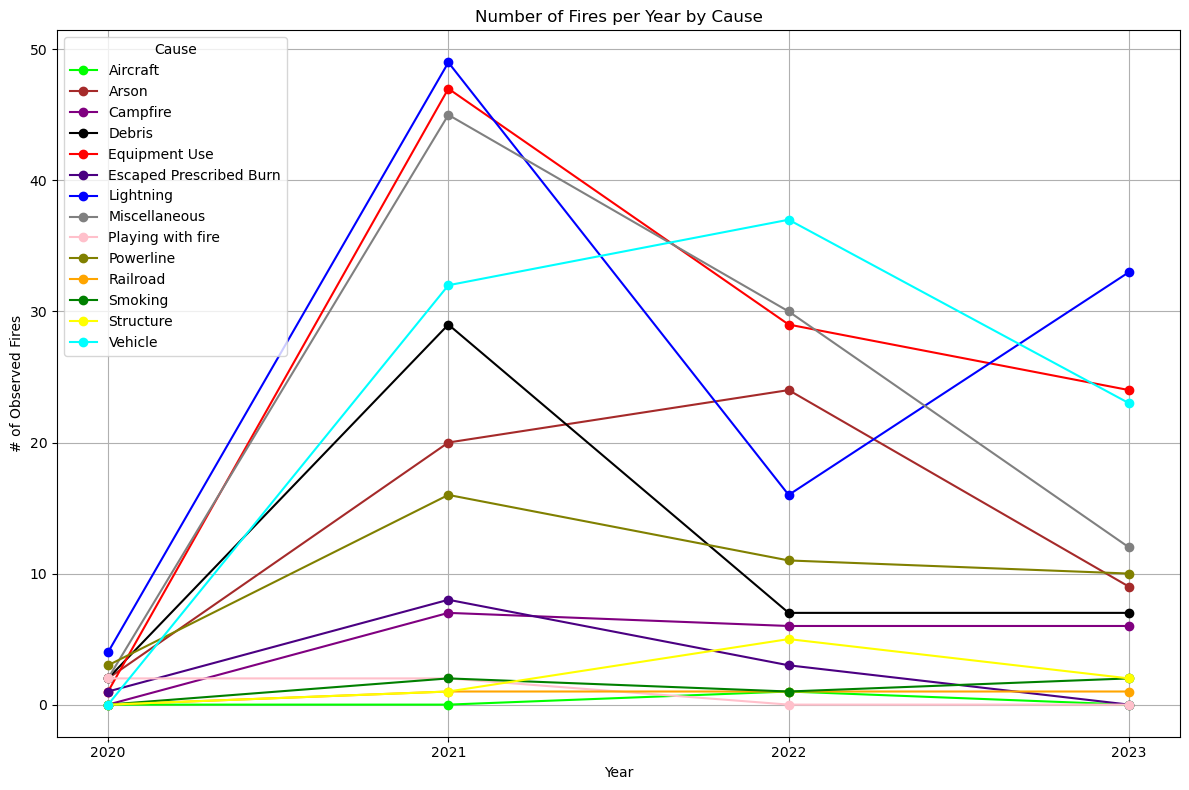

In [7]:
# line plots of number of fire causes per year (2020-2023)

# Ensure 'Alarm Date' is in datetime format if not already done
df_reordered['Alarm Date'] = pd.to_datetime(df_reordered['Alarm Date'])

# Count total number of fires per year, excluding 'Unknown / Unidentified'
filtered_df = df_reordered[df_reordered['Cause'] != 'Unknown / Unidentified']
fires_per_year = filtered_df.groupby(['Year', 'Cause']).size().unstack(fill_value=0)

# Define colors for each cause
cause_colors = {
    'Lightning': 'blue',
    'Equipment Use': 'red',
    'Smoking': 'green',
    'Campfire': 'purple',
    'Debris': 'black',
    'Railroad': 'orange',
    'Arson': 'brown',
    'Playing with fire': 'pink',
    'Miscellaneous': 'gray',
    'Vehicle': 'cyan',
    'Powerline': 'olive',
    'Firefighter Training': 'teal',
    'Non-Firefighter Training': 'magenta',
    'Structure': 'yellow',
    'Aircraft': 'lime',
    'Escaped Prescribed Burn': 'indigo',
    'Illegal Alien Campfire': 'gold'
}

# Create a line plot for each cause
plt.figure(figsize=(12, 8))
for cause in fires_per_year.columns:
    if cause in cause_colors:
        plt.plot(fires_per_year.index, fires_per_year[cause], marker='o', label=cause, color=cause_colors[cause])

# Customize the plot
plt.title('Number of Fires per Year by Cause')
plt.xlabel('Year')
plt.ylabel('# of Observed Fires')
plt.legend(title='Cause')
plt.grid(True)

# Save the figure
plt.savefig("output/Fig1.png")

# Display the plot
plt.tight_layout()
plt.show()

## 2021 Data Analysis and Visuals

In [8]:
# dataframes based on year of alarm dates

# ensure proper datetime form
df_reordered['Alarm Date'] = pd.to_datetime(df_reordered['Alarm Date'])

df_2020 = df_reordered[df_reordered['Alarm Date'].dt.year == 2020]
df_2021 = df_reordered[df_reordered['Alarm Date'].dt.year == 2021]
df_2022 = df_reordered[df_reordered['Alarm Date'].dt.year == 2022]
df_2023 = df_reordered[df_reordered['Alarm Date'].dt.year == 2023]

# reset indexes
df_2020 = df_2020.reset_index(drop=True)
df_2021 = df_2021.reset_index(drop=True)
df_2022 = df_2022.reset_index(drop=True)
df_2023 = df_2023.reset_index(drop=True)

#output csv
df_2021.to_csv("output/fires_2021.csv", encoding="utf-8", index=False, header=True)

In [9]:
df_2021.head()

,Year,Fire Name,Alarm Date,Containment Date,Duration (Days),Cause,Acres,Area,Perimeter
0,2021,CALVERT,2021-03-01,2021-03-01,0.0,Escaped Prescribed Burn,257.8323,1638694.50390625,10145.6694378656
1,2021,MEISS,2021-04-05,2021-04-05,0.0,Debris,21.86377,159533.55859375,2282.70245243055
2,2021,REFUGE,2021-03-27,2021-03-29,2.0,Escaped Prescribed Burn,873.3917,6392786.796875,12370.0851729225
3,2021,BONNY COMPLEX,2021-01-19,2021-01-22,3.0,Miscellaneous,20.30736,129374.5859375,2331.54648284773
4,2021,FREEDOM,2021-01-19,2021-01-22,3.0,Powerline,33.25922,211295.828125,4130.55440998935


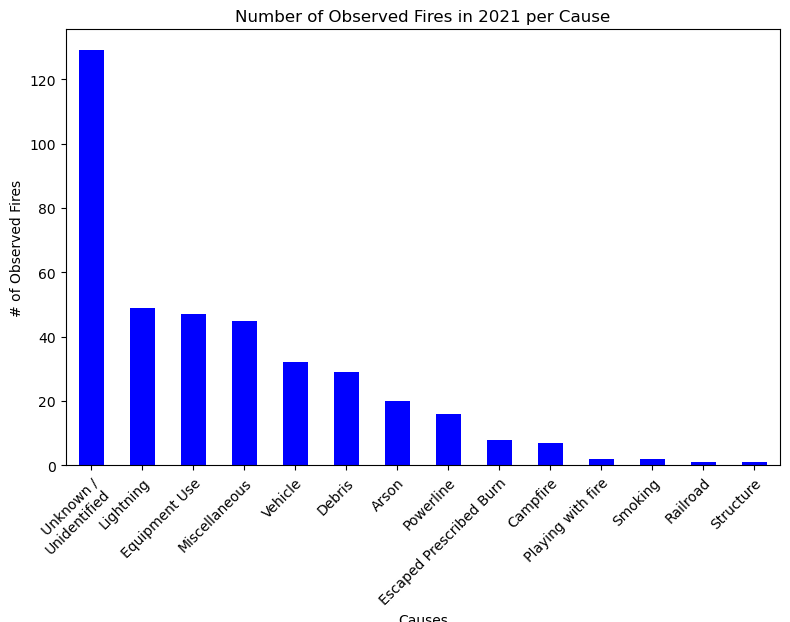

In [10]:
# bar plot  of fire causes for 2021

# group 2021 fire data by causes
grouped_by_cause_21 = df_2021.groupby('Cause').size()

# sort
grouped_by_cause_21 = grouped_by_cause_21.sort_values(ascending=False)

# plot
figure1 = grouped_by_cause_21.plot(kind="bar", facecolor="blue", figsize=(8,6),
                                title="Number of Observed Fires in 2021 per Cause",
                                xlabel="Causes",
                                ylabel="# of Observed Fires")

# x-tick rotation
xticklabels = grouped_by_cause_21.index
figure1.set_xticklabels(xticklabels, rotation=45, rotation_mode="anchor", ha="right", wrap=True)

# Save the figure
plt.savefig("output/Fig2.png")

# Resize plot to display labels
plt.tight_layout()
plt.show()

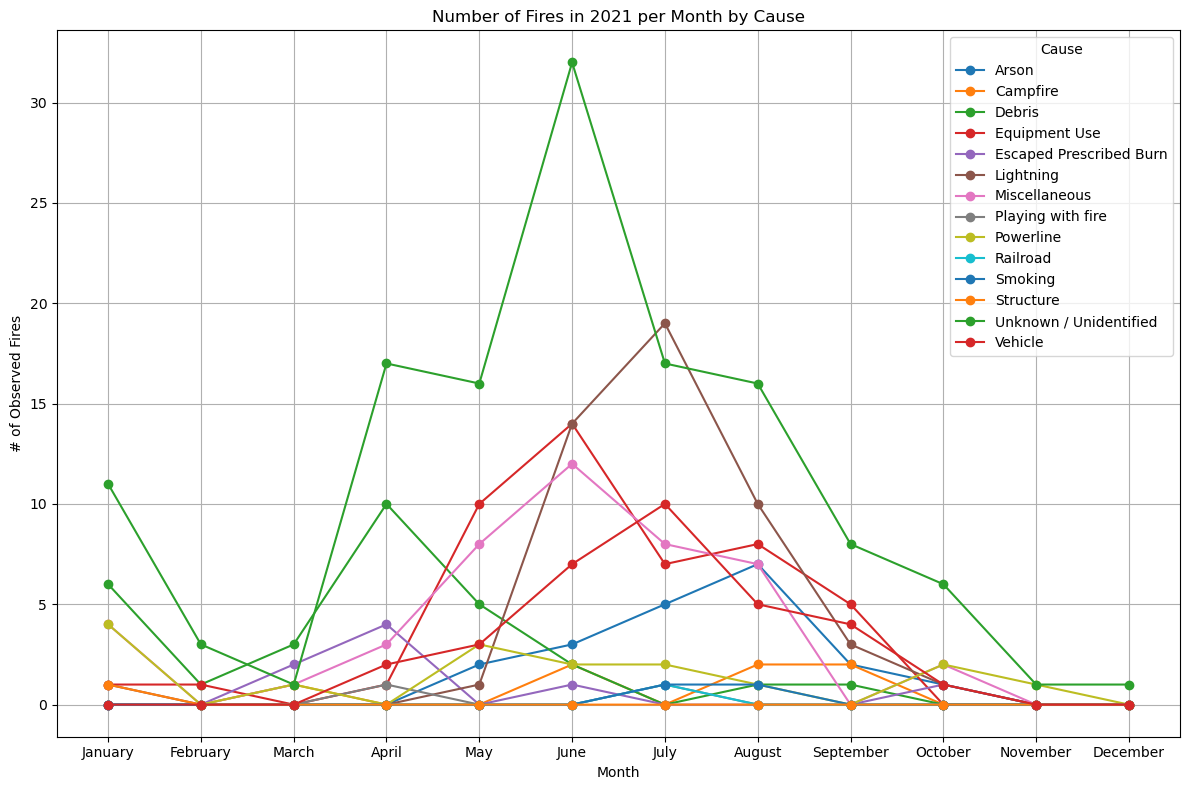

In [11]:
# line plots of number of fire causes per month in 2021

# Ensure 'Alarm Date' is in datetime format
df_2021['Alarm Date'] = pd.to_datetime(df_2021['Alarm Date'])

# Extract month from 'Alarm Date'
df_2021['Month'] = df_2021['Alarm Date'].dt.month

# Count total number of fires per month
fires_per_month = df_2021.groupby(['Month', 'Cause']).size().unstack(fill_value=0)

# Create a line plot for each cause
plt.figure(figsize=(12, 8))
fires_per_month.plot(kind='line', marker='o', ax=plt.gca())

# Customize the plot
plt.title('Number of Fires in 2021 per Month by Cause')
plt.xlabel('Month')
plt.ylabel('# of Observed Fires')
plt.xticks(ticks=range(1, 13), labels=[calendar.month_name[i] for i in range(1, 13)])
plt.legend(title='Cause')
plt.grid(True)

# Save the figure
plt.savefig("output/Fig3.png")

# Display the plot
plt.tight_layout()
plt.show()

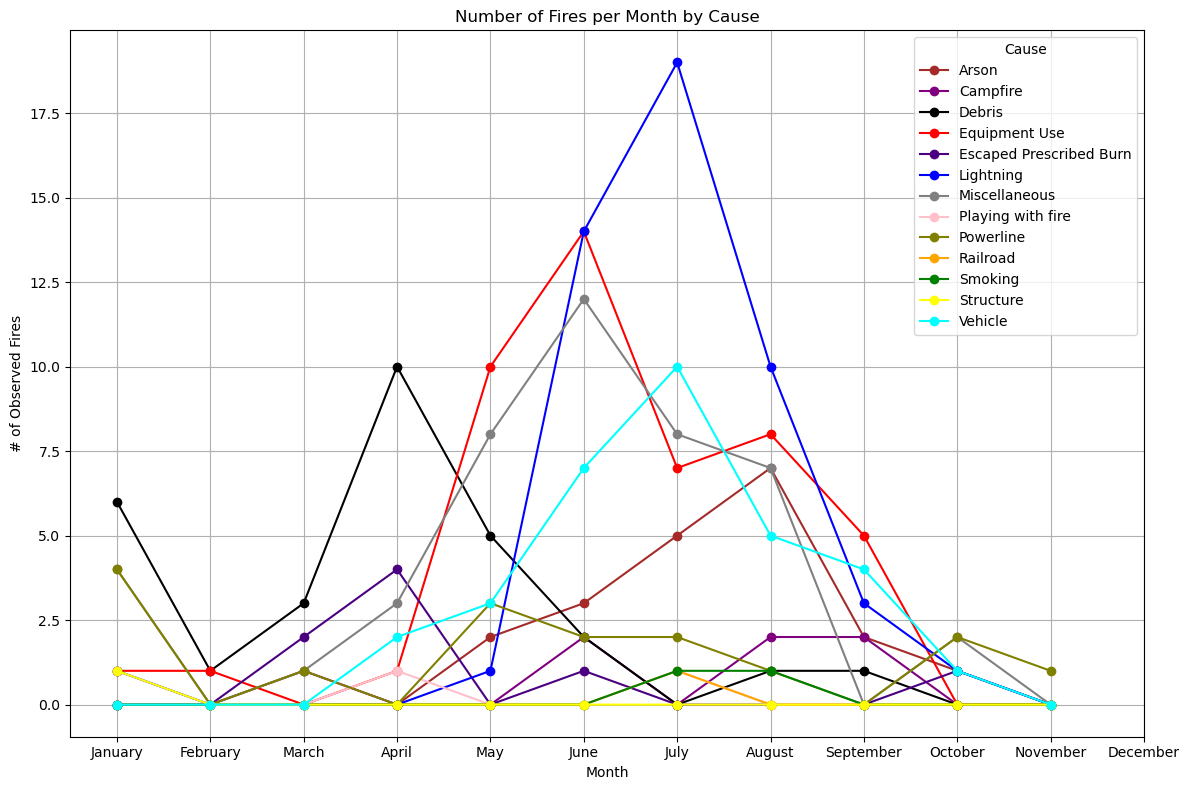

In [12]:
# plot number of fires per month by cause in 2021 - exlude unknown cause data

# Ensure 'Alarm Date' is in datetime format
df_2021['Alarm Date'] = pd.to_datetime(df_2021['Alarm Date'])

# Count total number of fires per month, excluding 'Unknown / Unidentified'
filtered_df = df_2021[df_2021['Cause'] != 'Unknown / Unidentified']
fires_per_month = filtered_df.groupby(['Month', 'Cause']).size().unstack(fill_value=0)

# Define colors for each cause, ensuring 'Debris' is black
cause_colors = {
    'Lightning': 'blue',
    'Equipment Use': 'red',
    'Smoking': 'green',
    'Campfire': 'purple',
    'Debris': 'black',
    'Railroad': 'orange',
    'Arson': 'brown',
    'Playing with fire': 'pink',
    'Miscellaneous': 'gray',
    'Vehicle': 'cyan',
    'Powerline': 'olive',
    'Firefighter Training': 'teal',
    'Non-Firefighter Training': 'magenta',
    'Structure': 'yellow',
    'Aircraft': 'lime',
    'Escaped Prescribed Burn': 'indigo',
    'Illegal Alien Campfire': 'gold'
}

# Create a line plot for each cause
plt.figure(figsize=(12, 8))
for cause in fires_per_month.columns:
    if cause in cause_colors:
        plt.plot(fires_per_month.index, fires_per_month[cause], marker='o', label=cause, color=cause_colors[cause])

# Customize the plot
plt.title('Number of Fires per Month by Cause')
plt.xlabel('Month')
plt.ylabel('# of Observed Fires')
plt.xticks(ticks=range(1, 13), labels=[calendar.month_name[i] for i in range(1, 13)])
plt.legend(title='Cause')
plt.grid(True)

# Save the figure
plt.savefig("output/Fig4.png")

# Display the plot
plt.tight_layout()
plt.show()

In [13]:
# dataframe for fire duration greater than 50 days
fifty_plus_fires_2021 = df_2021.loc[df_2021['Duration (Days)'] > 50]
fifty_plus_fires_2021 = fifty_plus_fires_2021.reset_index(drop=True)
fifty_plus_fires_2021.head()

,Year,Fire Name,Alarm Date,Containment Date,Duration (Days),Cause,Acres,Area,Perimeter,Month
0,2021,COLD,2021-08-13,2021-10-03,51.0,Lightning,6.576556,42874.734375,3256.49704347236,8
1,2021,SENTINEL,2021-07-29,2021-10-25,88.0,Lightning,12.4895,78887.5703125,1434.66902525067,7
2,2021,KNP Complex,2021-09-10,2021-12-16,97.0,Lightning,88257.13,554850423.507813,490677.28228528,9
3,2021,SOUTHERN,2021-05-02,2022-05-06,369.0,Equipment Use,5365.902,30944913.9375,55683.4880261368,5
4,2021,TIVY,2021-09-07,2022-09-07,365.0,Equipment Use,25.03143,158204.33203125,2381.46088638041,9


In [14]:
# dataframe for fire duration greater than 30 days
thirty_plus_fires_2021 = df_2021.loc[df_2021['Duration (Days)'] > 30]
thirty_plus_fires_2021 = thirty_plus_fires_2021.reset_index(drop=True)
thirty_plus_fires_2021.head()

,Year,Fire Name,Alarm Date,Containment Date,Duration (Days),Cause,Acres,Area,Perimeter,Month
0,2021,COLD,2021-08-13,2021-10-03,51.0,Lightning,6.576556,42874.734375,3256.49704347236,8
1,2021,PORCUPINE,2021-07-02,2021-08-04,33.0,Lightning,11.19756,72742.02734375,1902.72272281316,7
2,2021,SENTINEL,2021-07-29,2021-10-25,88.0,Lightning,12.4895,78887.5703125,1434.66902525067,7
3,2021,COUNTY LINE,2021-07-01,2021-08-15,45.0,Lightning,224.9265,1462300.12109375,6674.04139330863,7
4,2021,LUKENS,2021-07-01,2021-08-19,49.0,Lightning,918.1719,5970996.61328125,25798.6922711374,7


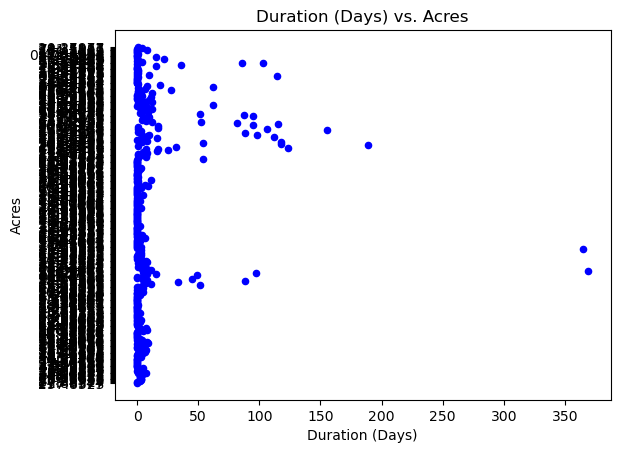

In [15]:
# scatterplot Fire Duration (Days) v Acres

# Convert 'Duration (Days)' column to float
df_2021['Duration (Days)'] = df_2021['Duration (Days)'].astype(float)

x = 'Duration (Days)'
y = 'Acres'

# Create scatter plot
df_2021.plot(kind='scatter', x=x, y=y, color='blue', title=f"{x} vs. {y}")

# Save the figure
plt.savefig("output/Fig5.png")

# Display plot
plt.show()

In [16]:
# max acres
df_2021['Acres'].max()

'97528.27'

In [17]:
# min acres
df_2021['Acres'].min()

'0.4009637'

In [19]:
# Stats summary table

# Ensure 'Fire Duration (Days)', 'Acres', 'Area', and 'Perimeter' columns are numeric
df_2021['Duration (Days)'] = pd.to_numeric(df_2021['Duration (Days)'], errors='coerce')
df_2021['Acres'] = pd.to_numeric(df_2021['Acres'], errors='coerce')

# Group by 'Cause'
grouped_by_cause_2021 = df_2021.groupby('Cause')

# Aggregate to get the average and standard deviation for each metric
summary_2021_df = grouped_by_cause_2021.agg({
    'Duration (Days)': ['mean', 'std'],
    'Acres': ['mean', 'std']
}).reset_index()

# Rename columns for clarity
summary_2021_df.columns = [
    'Cause',
    'Average Duration (Days)',
    'Stan Dev Duration (Days)',
    'Average Acres', 'Stan Dev Acres'
]

#output csv
summary_2021_df.to_csv("output/summary_2021.csv", encoding="utf-8", index=False, header=True)

# Display the resulting DataFrame
summary_2021_df

,Cause,Average Duration (Days),Stan Dev Duration (Days),Average Acres,Stan Dev Acres
0,Arson,1.450000,2.350252,496.167333,1906.594838
1,Campfire,3.571429,2.878492,157.180114,241.736281
2,Debris,1.551724,3.344358,63.460047,205.517487
3,Equipment Use,19.829787,75.959176,447.056213,1973.632243
4,Escaped Prescribed Burn,2.375000,3.248626,208.219648,283.383561
5,Lightning,37.571429,42.920954,22560.895770,52575.420897
6,Miscellaneous,7.577778,19.672880,178.325471,506.284730
7,Playing with fire,0.500000,0.707107,16.049347,14.835669
8,Powerline,7.937500,25.449214,60263.045691,240837.981082
9,Railroad,0.000000,NaN,18.597380,NaN
